# LBB Announcement

Dear Bapak/Ibu,

Selamat atas keberhasilannya melewati 3 hari pembelajaran di kelas **DSS - Optimizing Logistics Distribution Routes: A Graph Theory Approach**! Dalam rangka meningkatkan kemampuan Bapak dan Ibu dalam mengimplementasikan ilmu yang didapatkan di kelas, kami menyediakan modul Learn by Building (LBB) sebagai sarana Bapak dan Ibu untuk berlatih dalam membangun study case.

Modul LBB ini akan menjadi syarat Bapak/Ibu untuk mendapatkan sertifikat pembelajaran DSS pada kali ini. Pengerjaan LBB ini juga akan meningkatkan skill sebagai seorang Data Scientist agar dapat mengerjakan modul tambahan ini, hasil dari model tambahan ini dapat ditambahkan sebagai portofolio pribadi.

# LBB Rubrics

## Rubrics
Dalam pembuatan report, jangan lupa untuk menyertakan hal-hal berikut:

1. Import Data
2. Data Preprocessing & Feature Engineering: Create weight from Total Cost
3. Pembentukan Graph dan Visualisasi Graf
4. Pencarian Rute Optimal 
5. [Optional] Visualisasi Rute Baru
6. [Optional] Travelling Salesman Problem (TSP)

## Dataset

Kita adalah seorang data saintis di sebuah perusahaan produsen makanan dingin di Makassar. Kita diberikan data `records_mks`, dan `lokasi_makassar` yang berisi informasi pengiriman antar lokasinya.

In [3]:
import pandas as pd

records = pd.read_csv('records_mks.csv')

In [4]:
records.head()

,start,end,lokasi_start,latitude_start,longitude_start,lokasi_end,latitude_end,longitude_end,dist,lge/100km,add_cost,start_time,end_time
0,B,D,Nipah Mall,-5.138213,119.450386,Mall Ratu Indah,-5.152877,119.417858,7.5,15.08,0.0,2023-05-03 15:20:00,2023-05-03 15:45:00
1,A,B,Warehouse,-5.094272,119.491642,Nipah Mall,-5.138213,119.450386,11.0,13.52,15.5,2023-05-03 14:19:00,2023-05-03 14:44:00
2,F,G,Makassar Town Square,-5.139702,119.473848,Phinisi Point,-5.151032,119.404404,12.3,16.03,0.0,2023-05-02 15:10:00,2023-05-02 15:48:00
3,A,F,Warehouse,-5.094272,119.491642,Makassar Town Square,-5.139702,119.473848,9.7,14.45,0.0,2023-05-02 14:13:00,2023-05-02 14:39:00
4,E,C,Mall Panakkukang,-5.156903,119.446034,TSM Makassar,-5.158039,119.394943,9.8,15.27,0.0,2023-05-01 15:02:00,2023-05-01 15:33:00


In [5]:
records.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 0 to 21
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start            22 non-null     object 
 1   end              22 non-null     object 
 2   lokasi_start     22 non-null     object 
 3   latitude_start   22 non-null     float64
 4   longitude_start  22 non-null     float64
 5   lokasi_end       22 non-null     object 
 6   latitude_end     22 non-null     float64
 7   longitude_end    22 non-null     float64
 8   dist             22 non-null     float64
 9   lge/100km        22 non-null     float64
 10  add_cost         22 non-null     float64
 11  start_time       22 non-null     object 
 12  end_time         22 non-null     object 
dtypes: float64(7), object(6)
memory usage: 2.4+ KB


In [6]:
records[['start_time', 'end_time']] = records[['start_time', 'end_time']].astype('datetime64[ns]')

records.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 0 to 21
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   start            22 non-null     object        
 1   end              22 non-null     object        
 2   lokasi_start     22 non-null     object        
 3   latitude_start   22 non-null     float64       
 4   longitude_start  22 non-null     float64       
 5   lokasi_end       22 non-null     object        
 6   latitude_end     22 non-null     float64       
 7   longitude_end    22 non-null     float64       
 8   dist             22 non-null     float64       
 9   lge/100km        22 non-null     float64       
 10  add_cost         22 non-null     float64       
 11  start_time       22 non-null     datetime64[ns]
 12  end_time         22 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(7), object(4)
memory usage: 2.4+ KB


In [7]:
kolom_cat = ['start', 'lokasi_start', 'end', 'lokasi_end']

records[kolom_cat] = records[kolom_cat].astype('category')

records.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 0 to 21
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   start            22 non-null     category      
 1   end              22 non-null     category      
 2   lokasi_start     22 non-null     category      
 3   latitude_start   22 non-null     float64       
 4   longitude_start  22 non-null     float64       
 5   lokasi_end       22 non-null     category      
 6   latitude_end     22 non-null     float64       
 7   longitude_end    22 non-null     float64       
 8   dist             22 non-null     float64       
 9   lge/100km        22 non-null     float64       
 10  add_cost         22 non-null     float64       
 11  start_time       22 non-null     datetime64[ns]
 12  end_time         22 non-null     datetime64[ns]
dtypes: category(4), datetime64[ns](2), float64(7)
memory usage: 2.9 KB


**Deskripsi Data:**

Data `records` merupakan kumpulan catatan pengiriman distribusi. Berikut informasi dari setiap kolom:

- `start`: Lokasi berangkat
- `end`: Lokasi tujuan
- `lokasi_start`: Nama lokasi awal
- `latitude_start`: Titik latitude lokasi awal
- `longitude_start`: Titik longitude lokasi awal
- `lokasi_end`: Nama lokasi tujuan
- `latitude_end`: Titik latitude lokasi tujuan
- `longitude_end`: Titik longitude lokasi tujuan
- `dist`: Jarak tempuh (satuan km)
- `lge/100km`: Penggunaan liter bensin / 100 km
- `add_cost`: Tambahan biaya dalam satuan Ribu Rupiah (Biaya Tol)
- `start_time`: Waktu berangkat
- `end_time`: Waktu tiba

### BATASAN MASALAH

Selain informasi dari data ini, kita juga mengetahui beberapa informasi antara lain:

**Aturan**

- A (warehouse) adalah pusat penyimpanan. Setiap jalur distribusi berawal dari titik A

- Kebutuhan produk perminggu setiap lokasi adalah 1 ton.

- Truk dapat mengangkut produk dengan berat maksimal 2,2 ton.

- Waktu drop di setiap lokasi adalah -+ 30 menit

**Biaya:**

- Bahan bakar yang digunakan truk adalah Dexlite (Rp14,950/liter)

- Biaya pengeluaran mesin pendingin truk adalah Rp9,000/jam

> ⚠ Disclaimer: Bisnis problem dan data bersifat *dummy* yang terinspirasi dari hasil penelitian Liang, Wu dan Sun <sup>[[2](https://doi.org/10.2991/asei-15.2015.145)]</sup> dimana mencari rute optimal pada kasus cold chain logistics menggunakan Particle Swarm Optimization (PSO). Inspirasi lain juga berasal dari artikel Samir Saci <sup>[[3](https://towardsdatascience.com/transportation-network-analysis-with-graph-theory-55eceb7e4de4)]</sup> yang melakukan analisis jaringan distribusi menggunakan Teori Graf.

## Pre-processing & Feature Engineering

### Biaya Bensin

Informasi yang dapat digunakan:
- kolom `dist`, menyatakan jarak dalam satuan km.
- kolom `lge/100km`, menyatakan penggunaan liter bensin / 100 km.
- Truk di perusahaan kita menggunakan bensin Dexlite seharga Rp14,950/liter

💡 Langkah:
- Hitung penggunaan liter bahan bakar dengan formula:
    
    $ literneed =  lge/100km \times \frac{dist}{100}$
    
- Penggunaan liter akan dikalikan dengan biaya bensin/liter.

    $ costfuel =  literneed \times dexlitecost $


In [9]:
fuel = 14.95
# Mendapatkan total liter
records['literneed'] = records['lge/100km'] * (records['dist'] / 100)

records['cost_fuel'] = records['literneed'] * fuel

records.head()

,start,end,lokasi_start,latitude_start,longitude_start,lokasi_end,latitude_end,longitude_end,dist,lge/100km,add_cost,start_time,end_time,literneed,cost_fuel
0,B,D,Nipah Mall,-5.138213,119.450386,Mall Ratu Indah,-5.152877,119.417858,7.5,15.08,0.0,2023-05-03 15:20:00,2023-05-03 15:45:00,1.13100,16.908450
1,A,B,Warehouse,-5.094272,119.491642,Nipah Mall,-5.138213,119.450386,11.0,13.52,15.5,2023-05-03 14:19:00,2023-05-03 14:44:00,1.48720,22.233640
2,F,G,Makassar Town Square,-5.139702,119.473848,Phinisi Point,-5.151032,119.404404,12.3,16.03,0.0,2023-05-02 15:10:00,2023-05-02 15:48:00,1.97169,29.476766
3,A,F,Warehouse,-5.094272,119.491642,Makassar Town Square,-5.139702,119.473848,9.7,14.45,0.0,2023-05-02 14:13:00,2023-05-02 14:39:00,1.40165,20.954667
4,E,C,Mall Panakkukang,-5.156903,119.446034,TSM Makassar,-5.158039,119.394943,9.8,15.27,0.0,2023-05-01 15:02:00,2023-05-01 15:33:00,1.49646,22.372077


In [10]:
(records['end_time'] - records['start_time']).dt.total_seconds() / 60

0     25.0
1     25.0
2     38.0
3     26.0
4     31.0
5     26.0
6     32.0
7     26.0
8     31.0
9     41.0
10    24.0
11    39.0
12    27.0
13    24.0
14    17.0
15    38.0
16    26.0
17    26.0
18    16.0
19    26.0
20    18.0
21    26.0
dtype: float64

In [11]:
records['time'] = (records['end_time'] - records['start_time']).dt.total_seconds() / 60

records.head(2)

,start,end,lokasi_start,latitude_start,longitude_start,lokasi_end,latitude_end,longitude_end,dist,lge/100km,add_cost,start_time,end_time,literneed,cost_fuel,time
0,B,D,Nipah Mall,-5.138213,119.450386,Mall Ratu Indah,-5.152877,119.417858,7.5,15.08,0.0,2023-05-03 15:20:00,2023-05-03 15:45:00,1.1310,16.90845,25.0
1,A,B,Warehouse,-5.094272,119.491642,Nipah Mall,-5.138213,119.450386,11.0,13.52,15.5,2023-05-03 14:19:00,2023-05-03 14:44:00,1.4872,22.23364,25.0


In [12]:
# Biaya pendingin/jam dalam satuan ribu
refrigerator = 9
# total cost refri
records['cost_refri'] = (records['time']  / 60) * refrigerator

records.head(2)

,start,end,lokasi_start,latitude_start,longitude_start,lokasi_end,latitude_end,longitude_end,dist,lge/100km,add_cost,start_time,end_time,literneed,cost_fuel,time,cost_refri
0,B,D,Nipah Mall,-5.138213,119.450386,Mall Ratu Indah,-5.152877,119.417858,7.5,15.08,0.0,2023-05-03 15:20:00,2023-05-03 15:45:00,1.1310,16.90845,25.0,3.75
1,A,B,Warehouse,-5.094272,119.491642,Nipah Mall,-5.138213,119.450386,11.0,13.52,15.5,2023-05-03 14:19:00,2023-05-03 14:44:00,1.4872,22.23364,25.0,3.75


### Total Cost

Total cost akan kita jadikan sebagai `weight` dalam Graf kita nantinya. Sehingga kita akan mendapatkan kombinasi masing-masing rute beserta total biayanya.

Informasi yang digunakan:
- `cost_fuel`: total biaya bahan bakar
- `cost_refri`: total biaya maintain pendingin
- `add_cost`: *additional_cost*, dalam hal ini adalah biaya tol

💡 Langkah:

Menjumlahkan masing-masing cost

$ total = costfuel + costrefri + addcost $

In [13]:
records['total'] = records['cost_fuel'] + records['cost_refri'] + records['add_cost']

records.head(2)

,start,end,lokasi_start,latitude_start,longitude_start,lokasi_end,latitude_end,longitude_end,dist,lge/100km,add_cost,start_time,end_time,literneed,cost_fuel,time,cost_refri,total
0,B,D,Nipah Mall,-5.138213,119.450386,Mall Ratu Indah,-5.152877,119.417858,7.5,15.08,0.0,2023-05-03 15:20:00,2023-05-03 15:45:00,1.1310,16.90845,25.0,3.75,20.65845
1,A,B,Warehouse,-5.094272,119.491642,Nipah Mall,-5.138213,119.450386,11.0,13.52,15.5,2023-05-03 14:19:00,2023-05-03 14:44:00,1.4872,22.23364,25.0,3.75,41.48364


Mari kita lihat 5 rute yang memiliki cost terbesar

In [14]:
records.sort_values(by = 'total', ascending = False).head(5)

,start,end,lokasi_start,latitude_start,longitude_start,lokasi_end,latitude_end,longitude_end,dist,lge/100km,add_cost,start_time,end_time,literneed,cost_fuel,time,cost_refri,total
9,A,C,Warehouse,-5.094272,119.491642,TSM Makassar,-5.158039,119.394943,18.0,14.27,15.5,2023-04-25 14:01:00,2023-04-25 14:42:00,2.56860,38.400570,41.0,6.15,60.050570
11,A,G,Warehouse,-5.094272,119.491642,Phinisi Point,-5.151032,119.404404,15.8,14.90,15.5,2023-04-24 14:10:00,2023-04-24 14:49:00,2.35420,35.195290,39.0,5.85,56.545290
15,A,D,Warehouse,-5.094272,119.491642,Mall Ratu Indah,-5.152877,119.417858,15.6,14.55,15.5,2023-04-18 14:02:00,2023-04-18 14:40:00,2.26980,33.933510,38.0,5.70,55.133510
5,A,E,Warehouse,-5.094272,119.491642,Mall Panakkukang,-5.156903,119.446034,14.2,12.72,15.5,2023-05-01 14:02:00,2023-05-01 14:28:00,1.80624,27.003288,26.0,3.90,46.403288
17,A,E,Warehouse,-5.094272,119.491642,Mall Panakkukang,-5.156903,119.446034,14.2,12.72,15.5,2023-04-17 14:05:00,2023-04-17 14:31:00,1.80624,27.003288,26.0,3.90,46.403288


Tujuan utama kita adalah mencari rute dengan weight paling minimum (optimal).
Pertanyaan: weightnya dalam bentuk apa?

Total Cost -> Total biaya per-rute.

Total Biaya = Biaya bensin + Biaya pendingin + Addition Cost (Tol)

### Duplikat

Melihat apakah terdapat duplikat rute. Untuk melakukan pengecekan terhadap ada atau tidaknya data yang duplikat, kita dapat menggunakan method `duplicated()`.

**Syntax:**
```python
records.duplicated(subset = [kolom], keep = 'first')
```
Ket:
- subset = Kolom yang ingin dilihat duplikat, jika tidak diisi akan mempertimbangkan semua kolom.
- `keep='first'`, melihat baris **pertama (teratas)** dari nilai yang duplicate.
- `keep='last'`, melihat baris **terakhir (terbawah)** dari nilai yang duplicate.
- `keep=False`, melihat semua baris yang dulicate.

In [15]:
records[records.duplicated(subset = ['start', 'end'], keep = False)]

,start,end,lokasi_start,latitude_start,longitude_start,lokasi_end,latitude_end,longitude_end,dist,lge/100km,add_cost,start_time,end_time,literneed,cost_fuel,time,cost_refri,total
1,A,B,Warehouse,-5.094272,119.491642,Nipah Mall,-5.138213,119.450386,11.0,13.52,15.5,2023-05-03 14:19:00,2023-05-03 14:44:00,1.48720,22.233640,25.0,3.75,41.483640
3,A,F,Warehouse,-5.094272,119.491642,Makassar Town Square,-5.139702,119.473848,9.7,14.45,0.0,2023-05-02 14:13:00,2023-05-02 14:39:00,1.40165,20.954667,26.0,3.90,24.854667
5,A,E,Warehouse,-5.094272,119.491642,Mall Panakkukang,-5.156903,119.446034,14.2,12.72,15.5,2023-05-01 14:02:00,2023-05-01 14:28:00,1.80624,27.003288,26.0,3.90,46.403288
7,A,F,Warehouse,-5.094272,119.491642,Makassar Town Square,-5.139702,119.473848,9.7,14.45,0.0,2023-04-26 14:15:00,2023-04-26 14:41:00,1.40165,20.954667,26.0,3.90,24.854667
13,A,B,Warehouse,-5.094272,119.491642,Nipah Mall,-5.138213,119.450386,11.0,14.34,15.5,2023-04-19 14:09:00,2023-04-19 14:33:00,1.57740,23.582130,24.0,3.60,42.682130
17,A,E,Warehouse,-5.094272,119.491642,Mall Panakkukang,-5.156903,119.446034,14.2,12.72,15.5,2023-04-17 14:05:00,2023-04-17 14:31:00,1.80624,27.003288,26.0,3.90,46.403288
19,A,F,Warehouse,-5.094272,119.491642,Makassar Town Square,-5.139702,119.473848,9.7,14.45,0.0,2023-04-12 14:07:00,2023-04-12 14:33:00,1.40165,20.954667,26.0,3.90,24.854667
21,A,E,Warehouse,-5.094272,119.491642,Mall Panakkukang,-5.156903,119.446034,14.2,12.72,15.5,2023-04-05 14:01:00,2023-04-05 14:27:00,1.80624,27.003288,26.0,3.90,46.403288


Kita hanya membutuhkan data yang paling update/terbaru, sehingga baris duplikat yang lama akan kita drop. Untuk menangani data yang duplicate, kita bisa menggunakan method `drop_duplicates()`.


**Syntax:**
```python
records.drop_duplicates(subset = [kolom], keep = 'first')
```
Ket:
- subset = Kolom yang ingin dipertimbangkan duplikat, jika tidak diisi akan mempertimbangkan semua kolom.
- `keep='first'`, mempertahankan baris **pertama (teratas)** dari nilai yang duplicate.
- `keep='last'`, mempertahankan baris **terakhir (terbawah)** dari nilai yang duplicate.
- `keep=False`, tidak mempertahankan baris yang duplikat. Dengan kata lain, menghapus semua baris yang duplikat.

In [17]:
# Drop duplikat untuk data lama (pertahankan data terbaru)
records_new = records.drop_duplicates(subset = ['start', 'end'], keep = 'first')
# cek duplikat
records_new[records_new.duplicated(subset = ['start', 'end'], keep = False)]

,start,end,lokasi_start,latitude_start,longitude_start,lokasi_end,latitude_end,longitude_end,dist,lge/100km,add_cost,start_time,end_time,literneed,cost_fuel,time,cost_refri,total


In [18]:
data = records_new[['start', 'end', 'total']]

data['total'] = round(data['total'], 2)

data.head()

C:\Users\Kevin Alfandara(PC)\AppData\Local\Temp\ipykernel_12968\3166983266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total'] = round(data['total'], 2)


,start,end,total
0,B,D,20.66
1,A,B,41.48
2,F,G,35.18
3,A,F,24.85
4,E,C,27.02


## Networkx

Setelah mengetahui intuisi dari teori graf, selanjutnya kita akan menerapkan teori graf di python menggunakan library `networkx`.

`networkx` adalah salah satu *package*/*library* pada Python yang berfungsi untuk mengeksplorasi dan menganalisis graf dan algoritma graf. Networkx menyediakan berbagai jenis graf untuk menggambarkan jaringan termasuk *weighted* dan *unweighted graph*.

> Lebih lengkapnya silahkan kunjungi [official documentation](https://networkx.org/documentation/latest/reference/index.html)

Untuk menggunakan `networkx`, kita perlu import terlebih dahulu library dengan cara berikut ini:

In [20]:
import networkx as nx
print(nx.__version__)

3.1


In [36]:
# import
from helper import graph

In [25]:
# Membuat objek graph
Graf = nx.Graph()

# Iterasi per baris dari dataframe
for ind in range(len(data)):
    # Mengakses nilai setiap baris menjadi list
    row = data.iloc[ind].tolist()
    # Memasukkan edges tiap node ke dalam graf
    Graf.add_edge(row[0], row[1], weight = row[2])

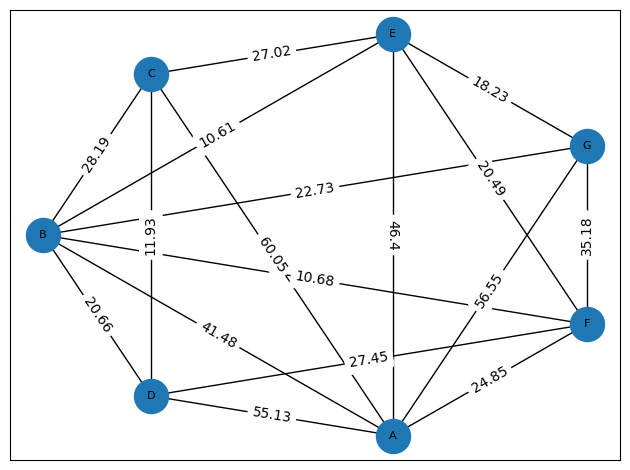

In [37]:
# Visualisasi graf
graph.visualize_graph(Graf)

## Pencarian Rute Optimal (Total Cost)

Kita dapat menggunakan fungsi `graph.get_total()` dimana akan membuat dataframe dengan weight terurut dari masing-masing rute.

**Sintaks**
```python
graph.get_total(G, source, target, cutoff)
```
keterangan:
- G = Objek Graf
- source = Node awal
- target = Node tujuan
- cutoff = Maksimal jumlah node yang dilewati untuk mencapai node target (tidak termasuk Node awal)

In [38]:
# code here A - G
graph.get_total(Graf, source = 'A', target = 'G', cutoff = 2)

,route,total
3,"[A, G]",56.55
1,"[A, F, G]",60.03
0,"[A, B, G]",64.21
2,"[A, E, G]",64.63


In [39]:
graph.get_total(Graf, source = 'A', target = 'F', cutoff = 2)

,route,total
1,"[A, F]",24.85
0,"[A, B, F]",52.16
2,"[A, E, F]",66.89
4,"[A, D, F]",82.58
3,"[A, G, F]",91.73


In [40]:
graph.get_total(Graf, source = 'A', target = 'C', cutoff = 2)

,route,total
2,"[A, C]",60.05
3,"[A, D, C]",67.06
0,"[A, B, C]",69.67
1,"[A, E, C]",73.42


In [41]:
graph.get_total(Graf, source = 'A', target = 'D', cutoff = 2)

,route,total
1,"[A, F, D]",52.30
3,"[A, D]",55.13
0,"[A, B, D]",62.14
2,"[A, C, D]",71.98


### Rekomendasi Rute Baru

Dari hasil yang didapatkan, terdapat 3 rekomendasi rute optimal yang telah mencakup keseluruhan lokasi, antara lain:

- A - f - G: 60.03 rb
- A - D - C: 67.06 rb

In [43]:
new_route = pd.DataFrame({'rute': ["[A F G]", "[A D C]"],
                        'cost': [60.03, 67.06]})

new_route

,rute,cost
0,[A F G],60.03
1,[A D C],67.06


### Perspektif Bisnis

In [45]:
# Week of year
records['weekofyear'] = records['start_time'].dt.isocalendar().week

records.head(10)

,start,end,lokasi_start,latitude_start,longitude_start,lokasi_end,latitude_end,longitude_end,dist,lge/100km,add_cost,start_time,end_time,literneed,cost_fuel,time,cost_refri,total,weekofyear
0,B,D,Nipah Mall,-5.138213,119.450386,Mall Ratu Indah,-5.152877,119.417858,7.5,15.08,0.0,2023-05-03 15:20:00,2023-05-03 15:45:00,1.13100,16.908450,25.0,3.75,20.658450,18
1,A,B,Warehouse,-5.094272,119.491642,Nipah Mall,-5.138213,119.450386,11.0,13.52,15.5,2023-05-03 14:19:00,2023-05-03 14:44:00,1.48720,22.233640,25.0,3.75,41.483640,18
2,F,G,Makassar Town Square,-5.139702,119.473848,Phinisi Point,-5.151032,119.404404,12.3,16.03,0.0,2023-05-02 15:10:00,2023-05-02 15:48:00,1.97169,29.476766,38.0,5.70,35.176766,18
3,A,F,Warehouse,-5.094272,119.491642,Makassar Town Square,-5.139702,119.473848,9.7,14.45,0.0,2023-05-02 14:13:00,2023-05-02 14:39:00,1.40165,20.954667,26.0,3.90,24.854667,18
4,E,C,Mall Panakkukang,-5.156903,119.446034,TSM Makassar,-5.158039,119.394943,9.8,15.27,0.0,2023-05-01 15:02:00,2023-05-01 15:33:00,1.49646,22.372077,31.0,4.65,27.022077,18
5,A,E,Warehouse,-5.094272,119.491642,Mall Panakkukang,-5.156903,119.446034,14.2,12.72,15.5,2023-05-01 14:02:00,2023-05-01 14:28:00,1.80624,27.003288,26.0,3.90,46.403288,18
6,F,D,Makassar Town Square,-5.139702,119.473848,Mall Ratu Indah,-5.152877,119.417858,9.6,15.78,0.0,2023-04-26 15:25:00,2023-04-26 15:57:00,1.51488,22.647456,32.0,4.80,27.447456,17
7,A,F,Warehouse,-5.094272,119.491642,Makassar Town Square,-5.139702,119.473848,9.7,14.45,0.0,2023-04-26 14:15:00,2023-04-26 14:41:00,1.40165,20.954667,26.0,3.90,24.854667,17
8,C,B,TSM Makassar,-5.158039,119.394943,Nipah Mall,-5.138213,119.450386,10.3,15.29,0.0,2023-04-25 15:20:00,2023-04-25 15:51:00,1.57487,23.544306,31.0,4.65,28.194306,17
9,A,C,Warehouse,-5.094272,119.491642,TSM Makassar,-5.158039,119.394943,18.0,14.27,15.5,2023-04-25 14:01:00,2023-04-25 14:42:00,2.56860,38.400570,41.0,6.15,60.050570,17


In [46]:
aggcost = records.pivot_table(index = 'weekofyear',
                    values = 'total',
                    aggfunc= 'sum')

aggcost

,total
weekofyear,
14,57.014828
15,35.531884
16,199.368149
17,215.321762
18,195.598888


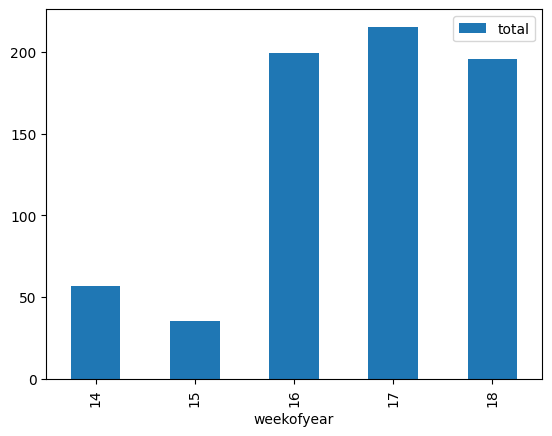

In [47]:
aggcost.plot(kind = 'bar');

In [48]:
records[records['weekofyear'] == 3]

,start,end,lokasi_start,latitude_start,longitude_start,lokasi_end,latitude_end,longitude_end,dist,lge/100km,add_cost,start_time,end_time,literneed,cost_fuel,time,cost_refri,total,weekofyear


In [49]:
new_cost = round(new_route['cost'].sum(), 2)

print(f"Total cost rute baru adalah Rp{new_cost},000")

Total cost rute baru adalah Rp127.09,000


# Submission

Bapak/Ibu selamat-lambatnya bisa menggumpulkkan hasil LBB yang sudah dikerjakan pada hari Kamis, 29 Juni 2023. Dengan cara melampirkan di google classroom hasil file dalam bentuk .zip yang berisi dataset yang digunakan dan .ipynb yang berisi code dan narasi dalam pengerjaan workflow pencarian rute optimal menggunakan graf.